In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
def graficar(df, col_A, col_B):
    eje_x = []
    eje_y = []
    for index, row in df.iterrows():
        eje_x.append(row[col_A])
        eje_y.append(row[col_B])
    plt.scatter(x = eje_x, y = eje_y, color='blue')
    plt.title('Scatter Plot')
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.show()

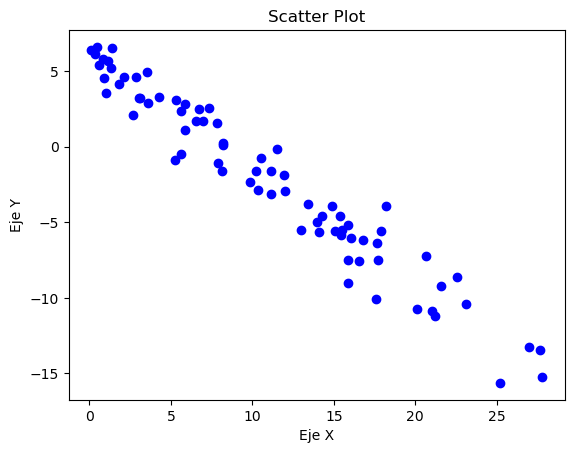

In [ ]:
datos1 = pd.read_csv('ejercicio_1.csv', sep=',')
datos2 = pd.read_csv('ejercicio_2.csv', sep=',')
datos3 = pd.read_csv('ejercicio_3.csv', sep=',')
datos4 = pd.read_csv('ejercicio_4.csv', sep=',')

# Grafico uno para probar
graficar(datos2, 'X', 'Y')